## Imports

In [182]:
import pandas as pd
import sklearn.metrics as sm 
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### Imports relating to Machine Learning Models

In [183]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Imports for efficiency / accuracy check

In [184]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

### Imports Ensemble Learning Models

In [185]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

## Constants

In [186]:
#constants
PATH = "//Users/sagarcbellad/MLProjects/HeartAttackPrediction/heart.csv"

nm, nw = 0, 0 #number of males and number of females
n1, n0 = 0, 0 #number of heartAttack cases VS number of non-heartAttack Cases

ALGO = list()
ACCURACY = list()

acutal_values = list()
predictions = list()
predictions1 = list()
predictions2 = list()
predictions3 = list()

In [187]:
data = pd.read_csv(PATH)
print(type(data))

<class 'pandas.core.frame.DataFrame'>


### Exploring the data

In [188]:
print("Shape")
print(data.shape)

Shape
(303, 14)


In [189]:
print("Data Descriptions")

#Full Forms

'''
cp - ChestPain
trestbps - restingBloodPressure
chol - serum cholestoral in mg/dl
fbs - fasting blood sugar > 120 mg/dl
restecg - resting electrocardiographic results (values 0,1,2) 
thalach - maximum heart rate achieved 
exang - exercise induced angina
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca	- number of major vessels (0-3) colored by flourosopy
thal - 0 = normal; 1 = fixed defect; 2 = reversable defect
target - 0= less chance of heart attack 1= more chance of heart attack

 '''

print(data.describe())

Data Descriptions
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      

In [190]:
print("Columns")
print(data.columns)

Columns
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [191]:
print("DataTypes")
print(data.dtypes)

DataTypes
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [192]:
print("Data Description")
print(data.describe())

Data Description
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0

In [193]:
#Checking for NULL values in the dataset
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Plotting

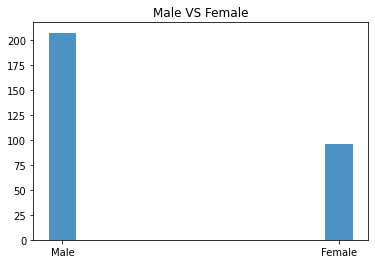

In [194]:
for i in data['sex']:
    if i == 1:
        nm += 1
    else:
        nw +=1

#Number of Males VS Females
y = [nm, nw]
x = ['Male', 'Female']
plt.title('Male VS Female')
plt.bar(x, y, width=0.1, alpha=0.8)

#ChestPain 
n0, n1, n2, n3 = 0, 0, 0, 0
for i in data['cp']:
    if i == 0:
        n0 +=1
    elif i == 1:
        n1 +=1
    elif i == 2:
        n2 +=1
    else:
        n3 +=1

Number of heart attack Cases 215
Number of non-heart attack Cases 281


<BarContainer object of 2 artists>

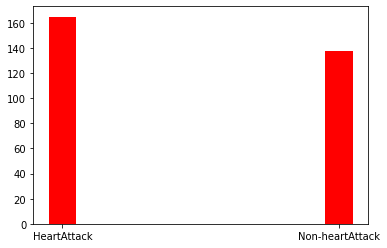

In [195]:
#Plotting number of heart Attack VS non-heartAttack Cases
Y = data['target']
for i in Y:
    if i == 1:  
        n1 = n1+1
    else:
        n0 +=1

print("Number of heart attack Cases", n1)
print("Number of non-heart attack Cases", n0)

x_label = ['HeartAttack', 'Non-heartAttack']
y_label = [165, 138]

plt.bar(x_label, y_label, color='red', width=0.1)

### Co-relation

In [196]:
#Seperating data with final output for checking co-relation
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

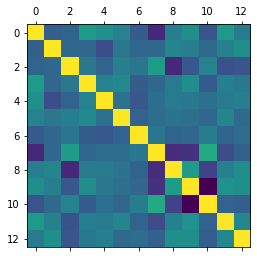

In [197]:
corr = X.corr()
plt.matshow(corr)

In [198]:
#printing
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


## Splitting the dataset

In [199]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.30)

### Checking the splits shape()

In [200]:
print("Training data shape")
print(x_train.shape)
print(y_train.shape)

Training data shape
(212, 13)
(212,)


In [201]:
print("Testing data shape")
print(x_test.shape)
print(y_test.shape)

Testing data shape
(91, 13)
(91,)


## Implementing the Models

[Logistic Regression model = regr],
[decision tree classifier = dtc], 
[support vector Machine = svm_model]

### Logistic Regression

In [202]:
regr = LogisticRegression()
regr.fit(x_train, y_train)

/Users/sagarcbellad/opt/anaconda3/envs/base1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [203]:
predicted_values = regr.predict(x_test)
print((predicted_values))

[0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1]


In [204]:
actual_values = y_test
print("Accuracy ", accuracy_score(actual_values, predicted_values))
print("R2-Score ", r2_score(actual_values, predicted_values))
print("Mean absolute error ",sm.mean_absolute_error(actual_values, predicted_values))
print("Mean squared error ",sm.mean_squared_error(actual_values, predicted_values))

print("Classification Report ", classification_report(actual_values, predicted_values))
print("Confusion Matrix ", confusion_matrix(actual_values, predicted_values))

Accuracy  0.8791208791208791
R2-Score  0.5064102564102564
Mean absolute error  0.12087912087912088
Mean squared error  0.12087912087912088
Classification Report                precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.89      0.90      0.90        52

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

Confusion Matrix  [[33  6]
 [ 5 47]]


In [205]:
ALGO.append("Logistic Regression")
ACCURACY.append(accuracy_score(actual_values, predicted_values))

## DecisionTreeRegressor

In [206]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predicted_values = dtr.predict(x_test)
acutal_values = y_test

In [207]:
actual_values = y_test
print("Accuracy ", accuracy_score(actual_values, predicted_values))
print("R2-Score ", r2_score(actual_values, predicted_values))
print("Mean absolute error ",sm.mean_absolute_error(actual_values, predicted_values))
print("Mean squared error ",sm.mean_squared_error(actual_values, predicted_values))

print("Classification Report ", classification_report(actual_values, predicted_values))
print("Confusion Matrix ", confusion_matrix(actual_values, predicted_values))

Accuracy  0.8241758241758241
R2-Score  0.28205128205128216
Mean absolute error  0.17582417582417584
Mean squared error  0.17582417582417584
Classification Report                precision    recall  f1-score   support

           0       0.79      0.79      0.79        39
           1       0.85      0.85      0.85        52

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Confusion Matrix  [[31  8]
 [ 8 44]]


In [208]:
ALGO.append("Decision Tree Regressor")
ACCURACY.append(accuracy_score(actual_values, predicted_values))

## Support Vector Machine

### Applying all three kernals for trial purposes

In [209]:
#Defining the model
svm_model1 = SVC(kernel='linear')
svm_model2 = SVC(kernel="poly")
svm_model3 = SVC(kernel="rbf")

In [210]:
#Fitting the models
svm_model1.fit(x_train, y_train)
svm_model2.fit(x_train, y_train)
svm_model3.fit(x_train, y_train)

SVC()

In [211]:
#Cheching the classification
predicted_values1 = svm_model1.predict(x_test)
predicted_values2 = svm_model2.predict(x_test)
predicted_values3 = svm_model3.predict(x_test)

In [212]:
actual_values = y_test

In [213]:
ALGO.append("SVM-LINEAR")
ALGO.append("SVM-POLY")
ALGO.append("SVM-RBF")

In [214]:
ACCURACY.append(accuracy_score(actual_values, predicted_values1))
ACCURACY.append(accuracy_score(actual_values, predicted_values2))
ACCURACY.append(accuracy_score(actual_values, predicted_values3))

#### SVM-linear results

In [215]:
print("Accuracy ", accuracy_score(actual_values, predicted_values1))
print("R2-Score ", r2_score(actual_values, predicted_values1))
print("Mean absolute error ",sm.mean_absolute_error(actual_values, predicted_values1))
print("Mean squared error ",sm.mean_squared_error(actual_values, predicted_values1))

print("Classification Report ", classification_report(actual_values, predicted_values1))
print("Confusion Matrix ", confusion_matrix(actual_values, predicted_values1))

Accuracy  0.8901098901098901
R2-Score  0.5512820512820513
Mean absolute error  0.10989010989010989
Mean squared error  0.10989010989010989
Classification Report                precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.90      0.90      0.90        52

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

Confusion Matrix  [[34  5]
 [ 5 47]]


#### SVM-poly results

In [216]:
print("Accuracy ", accuracy_score(actual_values, predicted_values2))
print("R2-Score ", r2_score(actual_values, predicted_values2))
print("Mean absolute error ",sm.mean_absolute_error(actual_values, predicted_values2))
print("Mean squared error ",sm.mean_squared_error(actual_values, predicted_values2))

print("Classification Report ", classification_report(actual_values, predicted_values2))
print("Confusion Matrix ", confusion_matrix(actual_values, predicted_values2))

Accuracy  0.6813186813186813
R2-Score  -0.3012820512820511
Mean absolute error  0.31868131868131866
Mean squared error  0.31868131868131866
Classification Report                precision    recall  f1-score   support

           0       0.66      0.54      0.59        39
           1       0.69      0.79      0.74        52

    accuracy                           0.68        91
   macro avg       0.68      0.66      0.67        91
weighted avg       0.68      0.68      0.68        91

Confusion Matrix  [[21 18]
 [11 41]]


#### SVM-rbf results

In [217]:
print("Accuracy ", accuracy_score(actual_values, predicted_values3))
print("R2-Score ", r2_score(actual_values, predicted_values3))
print("Mean absolute error ",sm.mean_absolute_error(actual_values, predicted_values3))
print("Mean squared error ",sm.mean_squared_error(actual_values, predicted_values3))

print("Classification Report ", classification_report(actual_values, predicted_values3))
print("Confusion Matrix ", confusion_matrix(actual_values, predicted_values3))

Accuracy  0.6703296703296703
R2-Score  -0.34615384615384603
Mean absolute error  0.32967032967032966
Mean squared error  0.32967032967032966
Classification Report                precision    recall  f1-score   support

           0       0.67      0.46      0.55        39
           1       0.67      0.83      0.74        52

    accuracy                           0.67        91
   macro avg       0.67      0.64      0.64        91
weighted avg       0.67      0.67      0.66        91

Confusion Matrix  [[18 21]
 [ 9 43]]


## KNN - Classifier

In [218]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
predicted_values = knn_model.predict(x_test)

### KNN results

In [219]:
print("Accuracy ", accuracy_score(actual_values, predicted_values))
print("R2-Score ", r2_score(actual_values, predicted_values))
print("Mean absolute error ",sm.mean_absolute_error(actual_values, predicted_values))
print("Mean squared error ",sm.mean_squared_error(actual_values, predicted_values))

print("Classification Report ", classification_report(actual_values, predicted_values))
print("Confusion Matrix ", confusion_matrix(actual_values, predicted_values))

Accuracy  0.6153846153846154
R2-Score  -0.5705128205128203
Mean absolute error  0.38461538461538464
Mean squared error  0.38461538461538464
Classification Report                precision    recall  f1-score   support

           0       0.56      0.51      0.53        39
           1       0.65      0.69      0.67        52

    accuracy                           0.62        91
   macro avg       0.61      0.60      0.60        91
weighted avg       0.61      0.62      0.61        91

Confusion Matrix  [[20 19]
 [16 36]]


In [220]:
ALGO.append("KNN - Classifier")
ACCURACY.append(accuracy_score(actual_values, predicted_values))

## Plotting the classification algorithms results

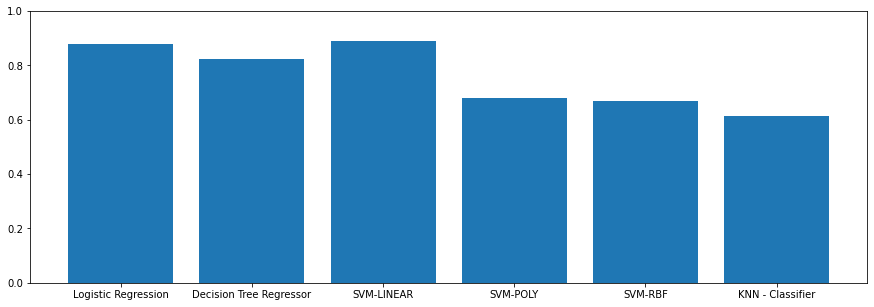

In [221]:
plt.figure(figsize=[15,5])
plt.ylim([0,1])
plt.bar(ALGO, ACCURACY)
plt.show()

## Ensemble Learning Models

In [222]:
estimators = []

model11 = LogisticRegression()
estimators.append(('logistic1', model11))
model12 = LogisticRegression()
estimators.append(('logistic2', model12))
model13 = LogisticRegression()
estimators.append(('logistic3', model13))
model14 = LogisticRegression()
estimators.append(('logistic4', model14))
model15 = LogisticRegression()
estimators.append(('logistic5', model15))

In [223]:
# Printing the values of the estimators
print(estimators)

[('logistic1', LogisticRegression()), ('logistic2', LogisticRegression()), ('logistic3', LogisticRegression()), ('logistic4', LogisticRegression()), ('logistic5', LogisticRegression())]


In [224]:
model16 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart1', model16))
model17 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart2', model17))
model18 = DecisionTreeClassifier(max_depth = 6)
estimators.append(('cart3', model18))
model19 = DecisionTreeClassifier(max_depth = 7)
estimators.append(('cart4', model19))
model20 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart5', model20))

print(estimators)

[('logistic1', LogisticRegression()), ('logistic2', LogisticRegression()), ('logistic3', LogisticRegression()), ('logistic4', LogisticRegression()), ('logistic5', LogisticRegression()), ('cart1', DecisionTreeClassifier(max_depth=4)), ('cart2', DecisionTreeClassifier(max_depth=3)), ('cart3', DecisionTreeClassifier(max_depth=6)), ('cart4', DecisionTreeClassifier(max_depth=7)), ('cart5', DecisionTreeClassifier(max_depth=2))]


In [225]:
model21 = SVC(kernel = 'poly')
estimators.append(('svm1', model21))
model22 = SVC(kernel = 'poly')
estimators.append(('svm2', model22))
model23 = SVC(kernel = 'rbf')
estimators.append(('svm3', model23))
model24 = SVC(kernel = 'rbf')
estimators.append(('svm4', model24))
model25 = SVC(kernel = 'poly')
estimators.append(('svm5', model25))

print(estimators)

[('logistic1', LogisticRegression()), ('logistic2', LogisticRegression()), ('logistic3', LogisticRegression()), ('logistic4', LogisticRegression()), ('logistic5', LogisticRegression()), ('cart1', DecisionTreeClassifier(max_depth=4)), ('cart2', DecisionTreeClassifier(max_depth=3)), ('cart3', DecisionTreeClassifier(max_depth=6)), ('cart4', DecisionTreeClassifier(max_depth=7)), ('cart5', DecisionTreeClassifier(max_depth=2)), ('svm1', SVC(kernel='poly')), ('svm2', SVC(kernel='poly')), ('svm3', SVC()), ('svm4', SVC()), ('svm5', SVC(kernel='poly'))]


In [226]:
model26 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
estimators.append(('knn1', model26))
model27 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
estimators.append(('knn2', model27))
model28 = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean')
estimators.append(('knn3', model28))
model29 = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
estimators.append(('knn4', model29))
model30 = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
estimators.append(('knn5', model30))

In [227]:
ensemble_model = VotingClassifier(estimators)

In [228]:
ensemble_model.fit(x_train, y_train)

/Users/sagarcbellad/opt/anaconda3/envs/base1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sagarcbellad/opt/anaconda3/envs/base1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

VotingClassifier(estimators=[('logistic1', LogisticRegression()),
                             ('logistic2', LogisticRegression()),
                             ('logistic3', LogisticRegression()),
                             ('logistic4', LogisticRegression()),
                             ('logistic5', LogisticRegression()),
                             ('cart1', DecisionTreeClassifier(max_depth=4)),
                             ('cart2', DecisionTreeClassifier(max_depth=3)),
                             ('cart3', DecisionTreeClassifier(max_depth=6)),
                             ('cart4'...
                             ('svm4', SVC()), ('svm5', SVC(kernel='poly')),
                             ('knn1',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=3)),
                             ('knn2', KNeighborsClassifier(metric='euclidean')),
                             ('knn3',
                          

In [229]:
predicted_values = ensemble_model.predict(x_test)

In [230]:
print("Accuracy ", accuracy_score(actual_values, predicted_values1))
print("R2-Score ", r2_score(actual_values, predicted_values1))
print("Mean absolute error ",sm.mean_absolute_error(actual_values, predicted_values1))
print("Mean squared error ",sm.mean_squared_error(actual_values, predicted_values1))

print("Classification Report ", classification_report(actual_values, predicted_values1))
print("Confusion Matrix ", confusion_matrix(actual_values, predicted_values1))

Accuracy  0.8901098901098901
R2-Score  0.5512820512820513
Mean absolute error  0.10989010989010989
Mean squared error  0.10989010989010989
Classification Report                precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.90      0.90      0.90        52

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

Confusion Matrix  [[34  5]
 [ 5 47]]


In [231]:
ALGO.append("Ensemble")
ACCURACY.append(accuracy_score(actual_values, predicted_values))

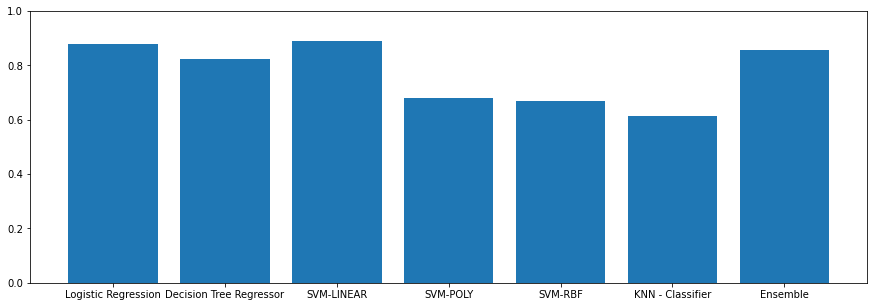

In [232]:
plt.figure(figsize=[15,5])
plt.ylim([0,1])
plt.bar(ALGO, ACCURACY)
plt.show()

### AdaBoost Ensemble Model

In [233]:
adaBoost_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
adaBoost_model = AdaBoostClassifier.fit(adaBoost_model, x_train, y_train)
predictions = adaBoost_model.predict(x_test)

In [234]:
print("AdaBoost Classifier Accuracy Score", accuracy_score(predictions, y_test))

AdaBoost Classifier Accuracy Score 0.8681318681318682


In [235]:
ALGO.append("AdaBoost")
ACCURACY.append(accuracy_score(actual_values, predicted_values))

### Gradient Ensemble Model

In [236]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=6, random_state=1)
gbc_model = gbc.fit(x_train, y_train)
predictions = gbc.predict(x_test)

In [237]:
print("Gradient Boosting Model Accuracy Score", accuracy_score(predictions, y_test))

Gradient Boosting Model Accuracy Score 0.8461538461538461


In [238]:
ALGO.append("G-Boosting")
ACCURACY.append(accuracy_score(actual_values, predicted_values))

### XGBM Model

In [239]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)
predictions = xgb_clf.predict(x_test)

In [240]:
print("XGBM Model Accuracy Score", accuracy_score(predictions, y_test))

XGBM Model Accuracy Score 0.9120879120879121


In [241]:
ALGO.append("XGBM")
ACCURACY.append(accuracy_score(actual_values, predicted_values))

### Bagging meta-estimator

In [242]:
model = BaggingClassifier(DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
bg_prediction = model.predict(x_test)
print(bg_prediction)

[0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0
 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1]


In [243]:
print("Bagging Meta Estimator Model Accuracy Score", accuracy_score(predictions, y_test))

Bagging Meta Estimator Model Accuracy Score 0.9120879120879121


In [244]:
ALGO.append("Bagging Meta Estimator")
ACCURACY.append(accuracy_score(actual_values, predicted_values))

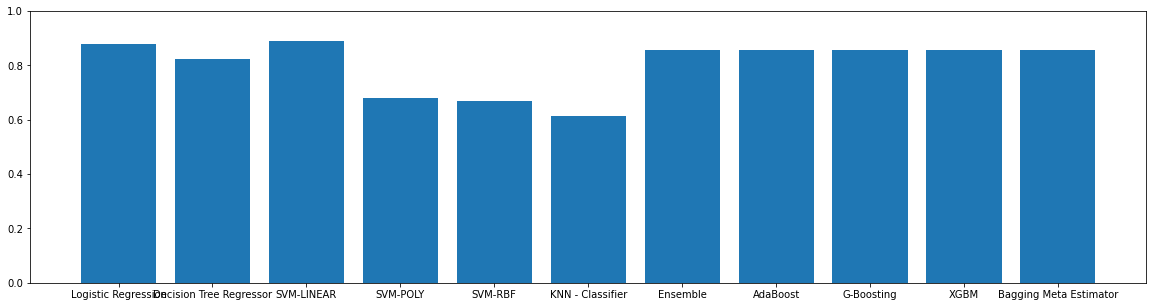

In [246]:
plt.figure(figsize=[20,5])
plt.ylim([0,1])
plt.bar(ALGO, ACCURACY)
plt.show()

In [250]:
for i in range(0, len(ALGO)):
    print(ALGO[i],"-----------", ACCURACY[i])

Logistic Regression ----------- 0.8791208791208791
Decision Tree Regressor ----------- 0.8241758241758241
SVM-LINEAR ----------- 0.8901098901098901
SVM-POLY ----------- 0.6813186813186813
SVM-RBF ----------- 0.6703296703296703
KNN - Classifier ----------- 0.6153846153846154
Ensemble ----------- 0.8571428571428571
AdaBoost ----------- 0.8571428571428571
G-Boosting ----------- 0.8571428571428571
XGBM ----------- 0.8571428571428571
Bagging Meta Estimator ----------- 0.8571428571428571
